https://cursos.alura.com.br/course/pln-deep-learning/task/67360

https://github.com/alura-cursos/pln-deep-learning/tree/aula-05




## Carregando dados

Exemplo de dados não-linearmente separáveis (distribuição em lua):
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html


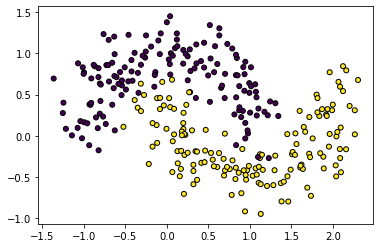

In [7]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', 
 c=Y1, s=25, edgecolor='k')



In [3]:
import torch
from torch import nn 

input_size = 2
hidden_size = 16
output_size = 1
net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size),  # hidden  
                    nn.ReLU(),    # ativação não linear
                    nn.Linear(in_features=hidden_size, out_features=output_size))  # output


print(net)




Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=1, bias=True)
)


In [8]:
from torchsummary import summary

summary(net, input_size=(1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 16]              48
              ReLU-2                [-1, 1, 16]               0
            Linear-3                 [-1, 1, 1]              17
Total params: 65
Trainable params: 65
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [10]:

tensor = torch.from_numpy(X1).float()

pred = net(tensor)

print(pred.size())

torch.Size([300, 1])


In [10]:
import torch.nn as nn
import torch.nn.functional as F

class MinhaRede(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(MinhaRede, self).__init__()
    # definir a arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, X):
    # gerar uma saída a partir do x
    hidden = self.relu(self.hidden(X))
    output = self.output(hidden)
    return output

# -----------------------------------------------------
# data

input_size = 2
hidden_size = 8
output_size = 1
net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size),  # hidden  
                    nn.ReLU(),    # ativação não linear
                    nn.Linear(in_features=hidden_size, out_features=output_size))  # output

# ------------------------------------------------------------
# Neural Network

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)


net = MinhaRede(input_size, hidden_size, output_size)
net = net.to(device)

tensor = torch.from_numpy(X1).float()
tensor = tensor.to(device)

pred = net(tensor)
print(pred.size())

print(Y1)
print(pred)




cuda
torch.Size([300, 1])
[0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0
 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0
 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0
 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0
 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1
 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 0]
tensor([[ 0.0468],
        [-0.1538],
        [-0.0572],
        [ 0.0198],
        [ 0.0343],
        [ 0.0565],
        [-0.0232],
        [ 0.0341],
        [-0.0751],
        [ 0.0042],
        [-0.0689],
        [ 0.0354],
        [-0.0214],
        [-0.0537],
        [-0.1403],
        [-0.0669],
        [-0.0352],
        [ 0.0279],
        [-0.1285],
   